In [1858]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from pandas import Series
from numpy import log

import plotly.express as px ## High level interface
import plotly.graph_objects as go ## Low level interface

In [1859]:
import yfinance as yf
import datetime

In [1860]:
## Get Live Bharti Aitr Data

end = datetime.datetime.today()
start = end - datetime.timedelta(days=365*10)  # last 10 years data
data = yf.download("BHARTIARTL.NS", start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [1861]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,BHARTIARTL.NS,BHARTIARTL.NS,BHARTIARTL.NS,BHARTIARTL.NS,BHARTIARTL.NS
Date,,,,,
2015-09-18,304.676453,309.841183,301.517853,307.365526,6783352
2015-09-21,300.749603,306.469222,299.981301,302.200848,2792725
2015-09-22,293.493256,303.054413,290.505406,303.054413,4558449
2015-09-23,288.456665,292.810428,287.048115,290.249381,4087837
2015-09-24,284.230988,289.054248,283.462685,288.456667,9967481


In [1862]:
data.tail()

Price,Close,High,Low,Open,Volume
Ticker,BHARTIARTL.NS,BHARTIARTL.NS,BHARTIARTL.NS,BHARTIARTL.NS,BHARTIARTL.NS
Date,,,,,
2025-09-08,1887.699951,1899.0,1884.099976,1898.0,2547552
2025-09-09,1893.699951,1904.0,1883.000000,1892.0,4517793
2025-09-10,1891.400024,1905.0,1883.000000,1904.0,3566139
2025-09-11,1913.000000,1916.0,1882.099976,1884.0,4718266
2025-09-12,1902.599976,1925.0,1901.599976,1925.0,3192824


In [1863]:
data.columns

MultiIndex([( 'Close', 'BHARTIARTL.NS'),
            (  'High', 'BHARTIARTL.NS'),
            (   'Low', 'BHARTIARTL.NS'),
            (  'Open', 'BHARTIARTL.NS'),
            ('Volume', 'BHARTIARTL.NS')],
           names=['Price', 'Ticker'])

In [1864]:
data.reset_index(inplace=True)

In [1865]:
data.shape

(2465, 6)

In [1866]:
data.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,BHARTIARTL.NS,BHARTIARTL.NS,BHARTIARTL.NS,BHARTIARTL.NS,BHARTIARTL.NS
0,2015-09-18,304.676453,309.841183,301.517853,307.365526,6783352
1,2015-09-21,300.749603,306.469222,299.981301,302.200848,2792725
2,2015-09-22,293.493256,303.054413,290.505406,303.054413,4558449
3,2015-09-23,288.456665,292.810428,287.048115,290.249381,4087837
4,2015-09-24,284.230988,289.054248,283.462685,288.456667,9967481


In [1867]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2465 entries, 0 to 2464
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   (Date, )                 2465 non-null   datetime64[ns]
 1   (Close, BHARTIARTL.NS)   2465 non-null   float64       
 2   (High, BHARTIARTL.NS)    2465 non-null   float64       
 3   (Low, BHARTIARTL.NS)     2465 non-null   float64       
 4   (Open, BHARTIARTL.NS)    2465 non-null   float64       
 5   (Volume, BHARTIARTL.NS)  2465 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 115.7 KB


In [1868]:
data.to_csv("BHARTIARTL.csv")

In [1869]:
df = pd.read_csv("BHARTIARTL.csv")

In [1870]:
df.head()

,Price,Date,Close,High,Low,Open,Volume
0,Ticker,NaN,BHARTIARTL.NS,BHARTIARTL.NS,BHARTIARTL.NS,BHARTIARTL.NS,BHARTIARTL.NS
1,0,2015-09-18,304.67645263671875,309.84118345782616,301.5178531056118,307.3655259283842,6783352
2,1,2015-09-21,300.7496032714844,306.4692218577216,299.98130061159867,302.20084805268607,2792725
3,2,2015-09-22,293.4932556152344,303.05441331754196,290.50540647980023,303.05441331754196,4558449
4,3,2015-09-23,288.4566650390625,292.8104281538849,287.04811502406363,290.2493808252675,4087837


In [1871]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   2466 non-null   object
 1   Date    2465 non-null   object
 2   Close   2466 non-null   object
 3   High    2466 non-null   object
 4   Low     2466 non-null   object
 5   Open    2466 non-null   object
 6   Volume  2466 non-null   object
dtypes: object(7)
memory usage: 135.0+ KB


In [1872]:
df.drop(['Price'],axis=1,inplace=True)

In [1873]:
df.columns

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [1874]:
df.head()

,Date,Close,High,Low,Open,Volume
0,NaN,BHARTIARTL.NS,BHARTIARTL.NS,BHARTIARTL.NS,BHARTIARTL.NS,BHARTIARTL.NS
1,2015-09-18,304.67645263671875,309.84118345782616,301.5178531056118,307.3655259283842,6783352
2,2015-09-21,300.7496032714844,306.4692218577216,299.98130061159867,302.20084805268607,2792725
3,2015-09-22,293.4932556152344,303.05441331754196,290.50540647980023,303.05441331754196,4558449
4,2015-09-23,288.4566650390625,292.8104281538849,287.04811502406363,290.2493808252675,4087837


In [1875]:
df.isnull().sum()

Date      1
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [1876]:
df = df.dropna(subset=['Date'])

In [1877]:
df.head()

,Date,Close,High,Low,Open,Volume
1,2015-09-18,304.67645263671875,309.84118345782616,301.5178531056118,307.3655259283842,6783352
2,2015-09-21,300.7496032714844,306.4692218577216,299.98130061159867,302.20084805268607,2792725
3,2015-09-22,293.4932556152344,303.05441331754196,290.50540647980023,303.05441331754196,4558449
4,2015-09-23,288.4566650390625,292.8104281538849,287.04811502406363,290.2493808252675,4087837
5,2015-09-24,284.2309875488281,289.05424808919264,283.4626849088448,288.45666652192614,9967481


In [1878]:
def convert_and_verify(df, columns):
    # Before conversion
    print("Before conversion:")
    print(df[columns].dtypes)
    
    # Convert to numeric
    for col in columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # After conversion
    print("\nAfter conversion:")
    print(df[columns].dtypes)
    
    # Check for any remaining non-numeric values
    print("\nNull values after conversion:")
    print(df[columns].isnull().sum())
    
    return df

In [1879]:
numeric_columns = ['Close', 'High', 'Low', 'Open', 'Volume']

In [1880]:
convert_and_verify(df, numeric_columns)

Before conversion:
Close     object
High      object
Low       object
Open      object
Volume    object
dtype: object

After conversion:
Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object

Null values after conversion:
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


,Date,Close,High,Low,Open,Volume
1,2015-09-18,304.676453,309.841183,301.517853,307.365526,6783352
2,2015-09-21,300.749603,306.469222,299.981301,302.200848,2792725
3,2015-09-22,293.493256,303.054413,290.505406,303.054413,4558449
4,2015-09-23,288.456665,292.810428,287.048115,290.249381,4087837
5,2015-09-24,284.230988,289.054248,283.462685,288.456667,9967481
...,...,...,...,...,...,...
2461,2025-09-08,1887.699951,1899.000000,1884.099976,1898.000000,2547552
2462,2025-09-09,1893.699951,1904.000000,1883.000000,1892.000000,4517793
2463,2025-09-10,1891.400024,1905.000000,1883.000000,1904.000000,3566139
2464,2025-09-11,1913.000000,1916.000000,1882.099976,1884.000000,4718266


In [1881]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

## Exploratory Data Analysis

In [1882]:
df1 = df.copy()

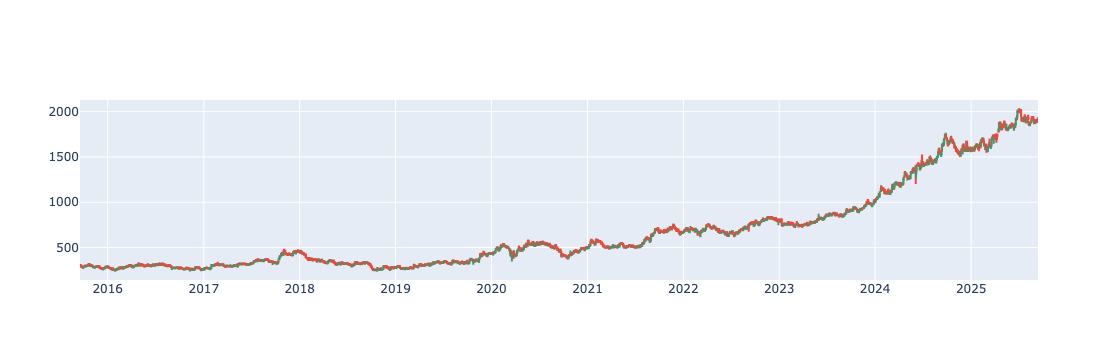

In [1883]:
fig = go.Figure(data=[go.Candlestick(x = df1['Date'], open = df1['Open'], 
                                    high = df1['High'],
                                    low = df1['Low'], 
                                    close = df1['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [1884]:
df1['Time_Stamp'] = pd.DataFrame(df1, columns=['Date'])
df1.head()

,Date,Close,High,Low,Open,Volume,Time_Stamp
1,2015-09-18,304.676453,309.841183,301.517853,307.365526,6783352,2015-09-18
2,2015-09-21,300.749603,306.469222,299.981301,302.200848,2792725,2015-09-21
3,2015-09-22,293.493256,303.054413,290.505406,303.054413,4558449,2015-09-22
4,2015-09-23,288.456665,292.810428,287.048115,290.249381,4087837,2015-09-23
5,2015-09-24,284.230988,289.054248,283.462685,288.456667,9967481,2015-09-24


In [1885]:
df1.set_index('Time_Stamp', inplace=True)

In [1886]:
df1.head()

,Date,Close,High,Low,Open,Volume
Time_Stamp,,,,,,
2015-09-18,2015-09-18,304.676453,309.841183,301.517853,307.365526,6783352
2015-09-21,2015-09-21,300.749603,306.469222,299.981301,302.200848,2792725
2015-09-22,2015-09-22,293.493256,303.054413,290.505406,303.054413,4558449
2015-09-23,2015-09-23,288.456665,292.810428,287.048115,290.249381,4087837
2015-09-24,2015-09-24,284.230988,289.054248,283.462685,288.456667,9967481


In [1887]:
start_date = df1.index.min()
end_date = df1.index.max()
print("Start Date of Stocks :", start_date)
print("End Date of Stocks :", end_date)

Start Date of Stocks : 2015-09-18 00:00:00
End Date of Stocks : 2025-09-12 00:00:00


Text(0, 0.5, 'Volume')

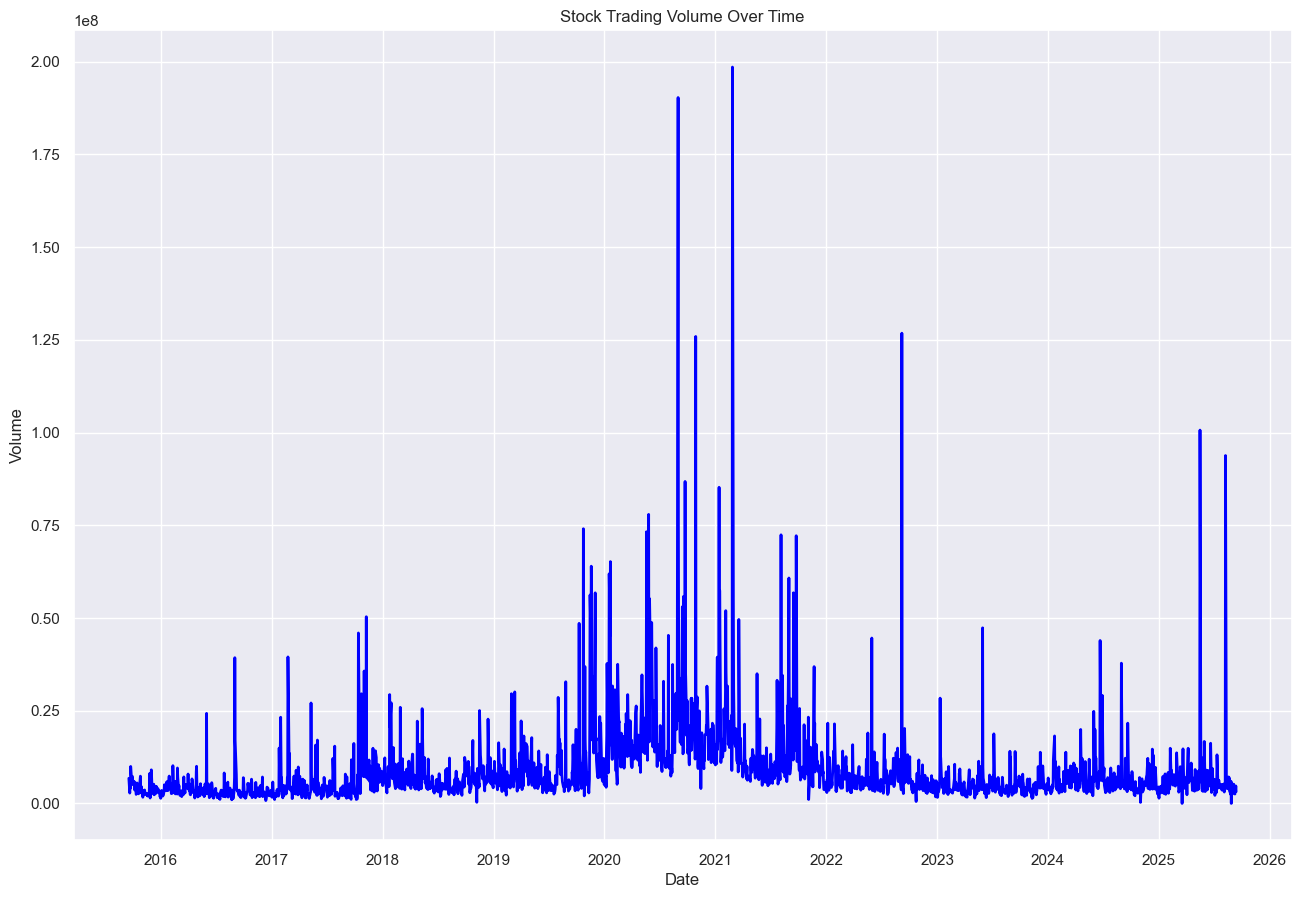

In [1888]:
plt.figure(figsize=(14, 10))
plt.plot(df1['Volume'], color='blue', linewidth=2)

# Add title and labels
plt.title('Stock Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')

Text(0, 0.5, 'Price')

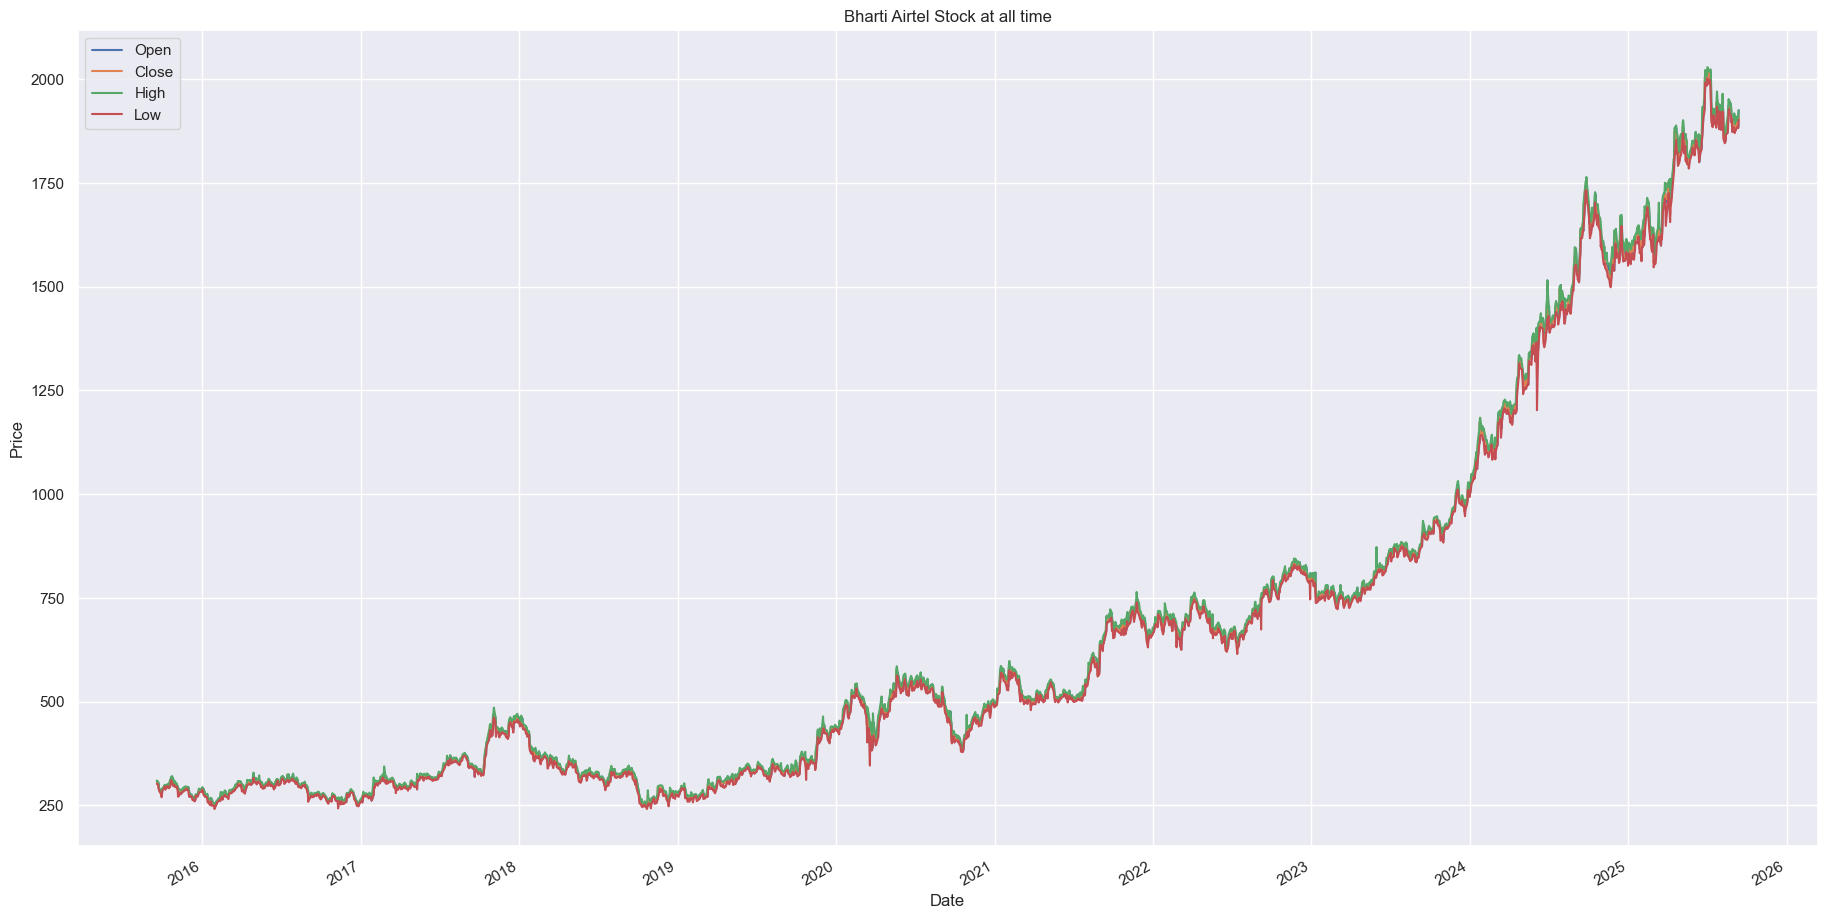

In [1889]:
df1[['Open','Close','High','Low']].plot(figsize = (20,12))
plt.title('Bharti Airtel Stock at all time')
plt.xlabel("Date")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

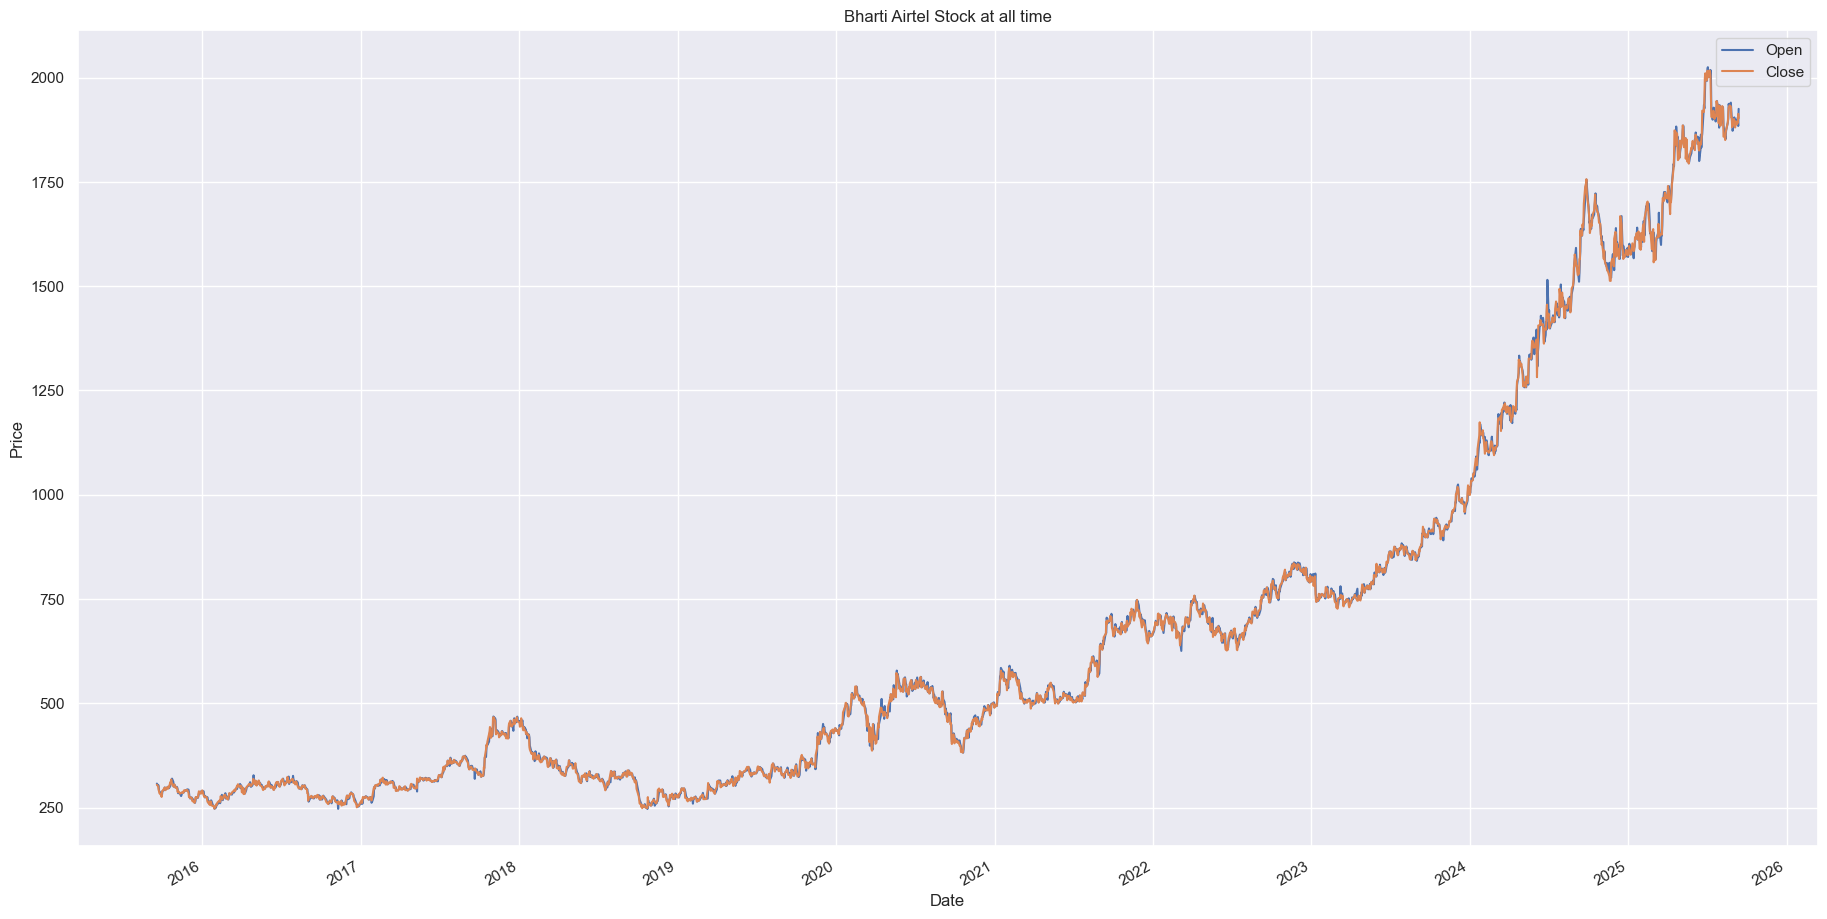

In [1890]:
df1[['Open','Close']].plot(figsize = (20,12))
plt.title('Bharti Airtel Stock at all time')
plt.xlabel("Date")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

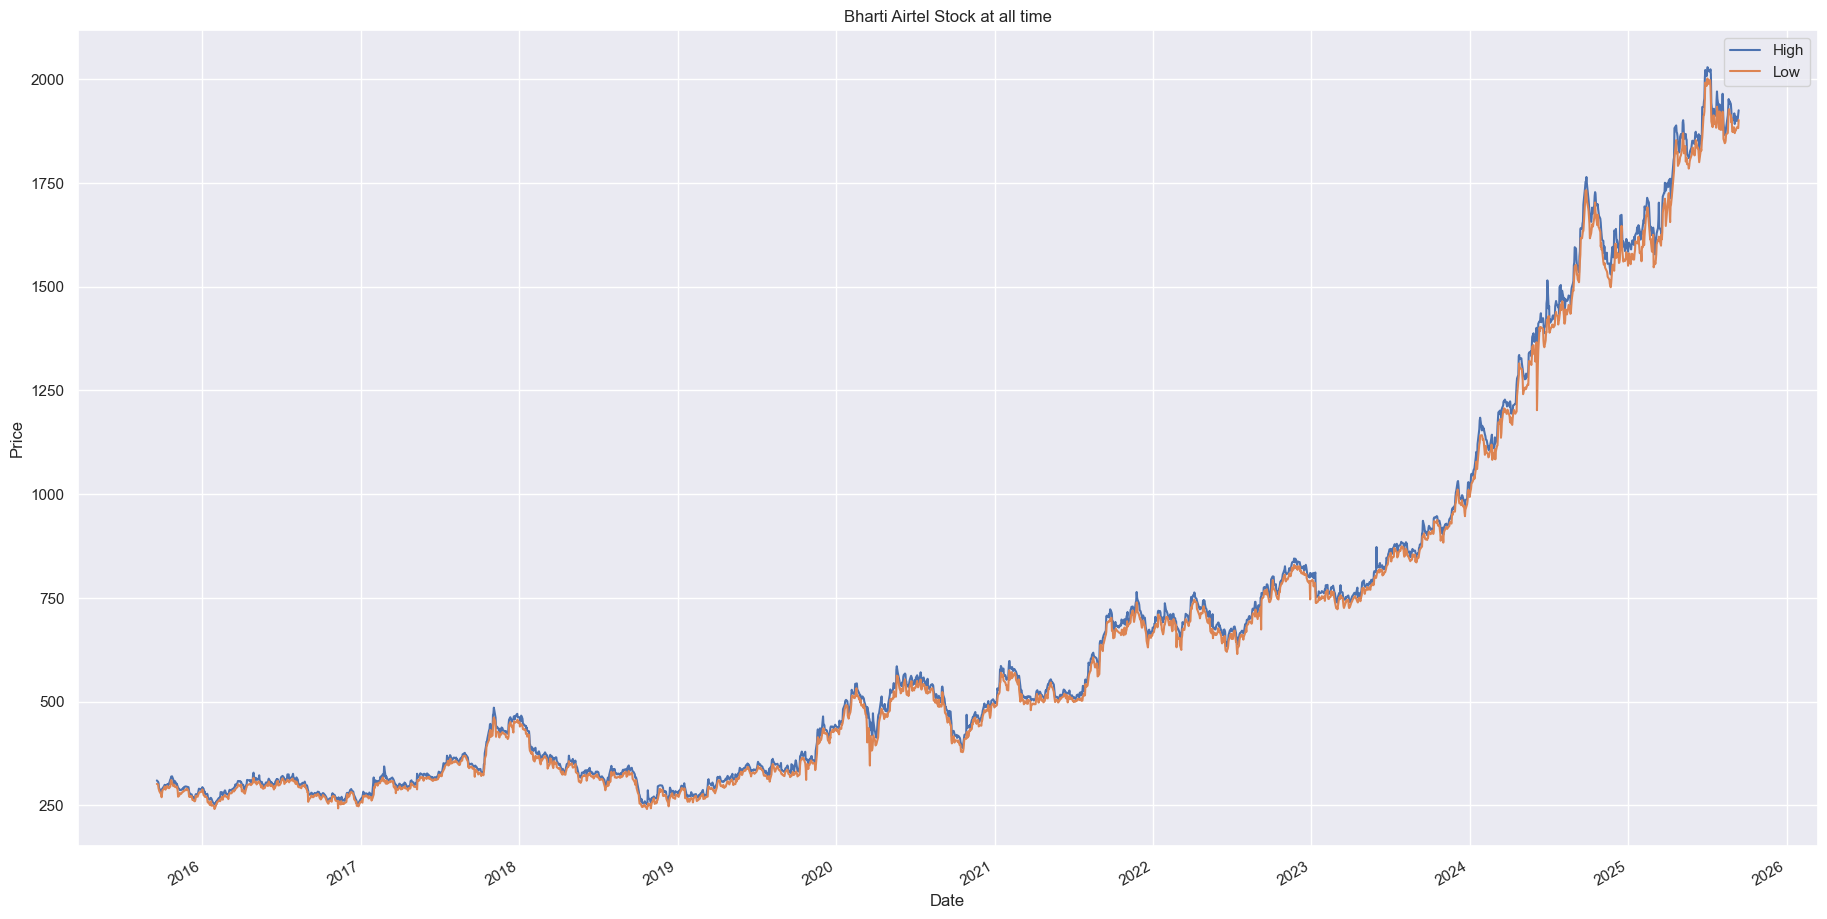

In [1891]:
df1[['High','Low']].plot(figsize = (20,12))
plt.title('Bharti Airtel Stock at all time')
plt.xlabel("Date")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

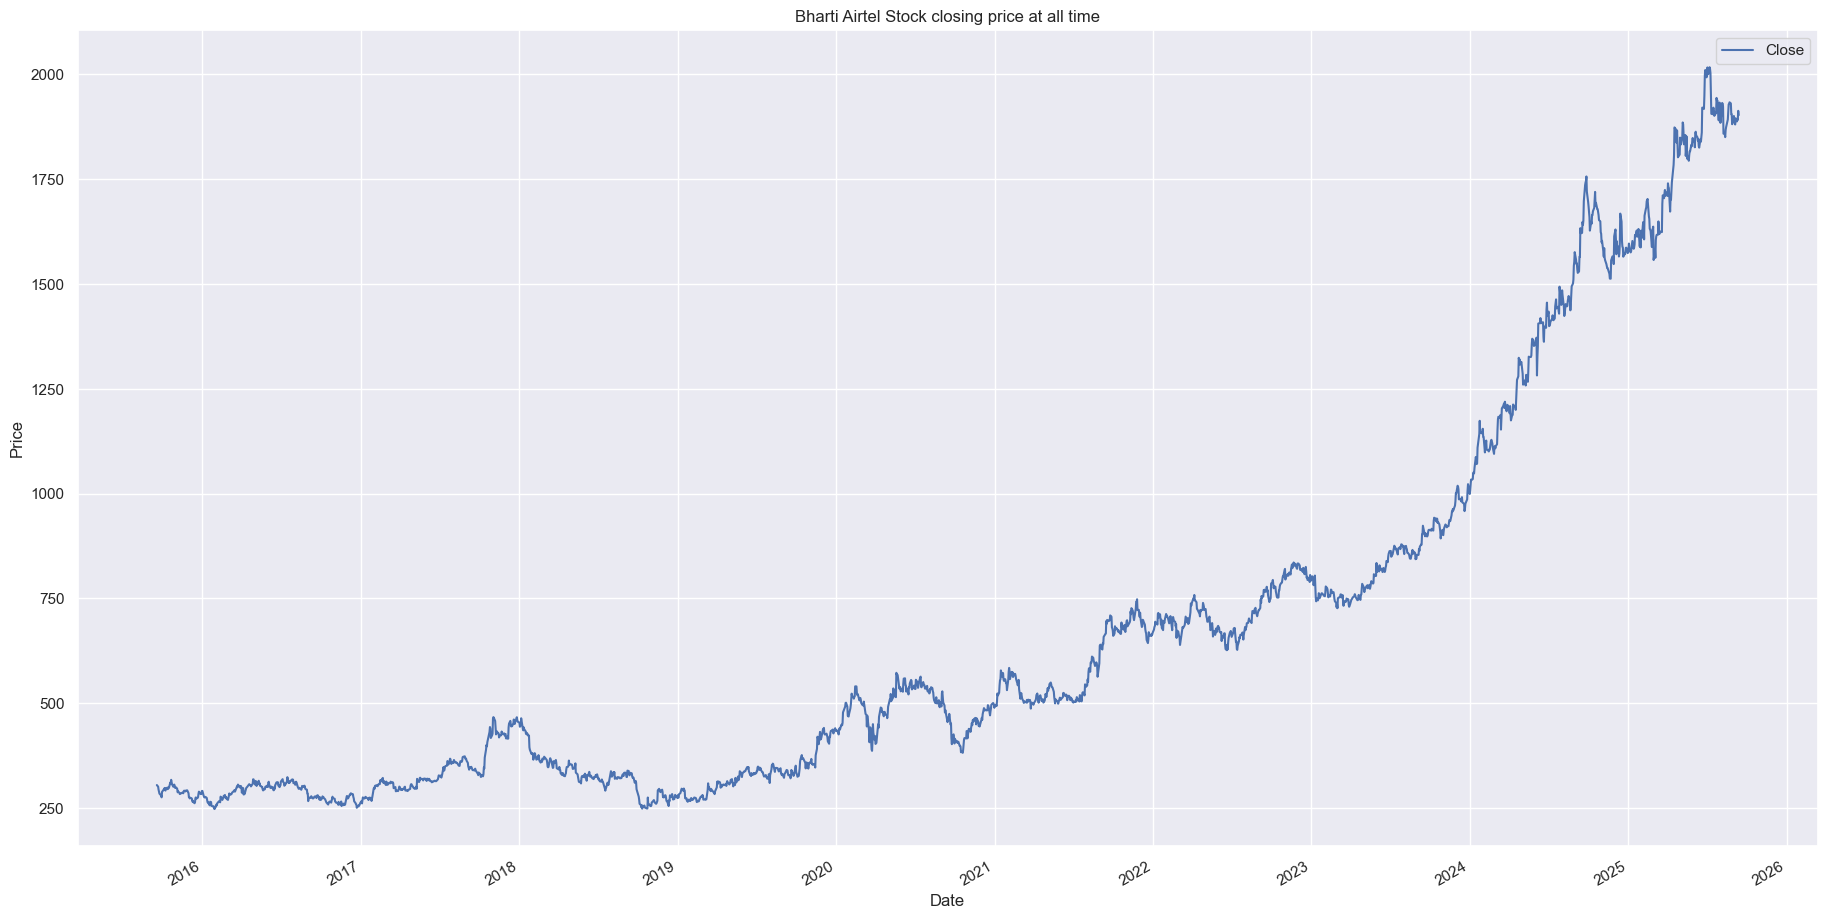

In [1892]:
df1[['Close']].plot(figsize = (20,12))
plt.title('Bharti Airtel Stock closing price at all time')
plt.xlabel("Date")
plt.ylabel("Price")

In [1893]:
df1.head()

,Date,Close,High,Low,Open,Volume
Time_Stamp,,,,,,
2015-09-18,2015-09-18,304.676453,309.841183,301.517853,307.365526,6783352
2015-09-21,2015-09-21,300.749603,306.469222,299.981301,302.200848,2792725
2015-09-22,2015-09-22,293.493256,303.054413,290.505406,303.054413,4558449
2015-09-23,2015-09-23,288.456665,292.810428,287.048115,290.249381,4087837
2015-09-24,2015-09-24,284.230988,289.054248,283.462685,288.456667,9967481


In [1894]:
## Simple moving average
ma100 = df1.Close.rolling(100).mean()
ma200 = df1.Close.rolling(200).mean()

In [1895]:
stock = 'Bharati Airtel'

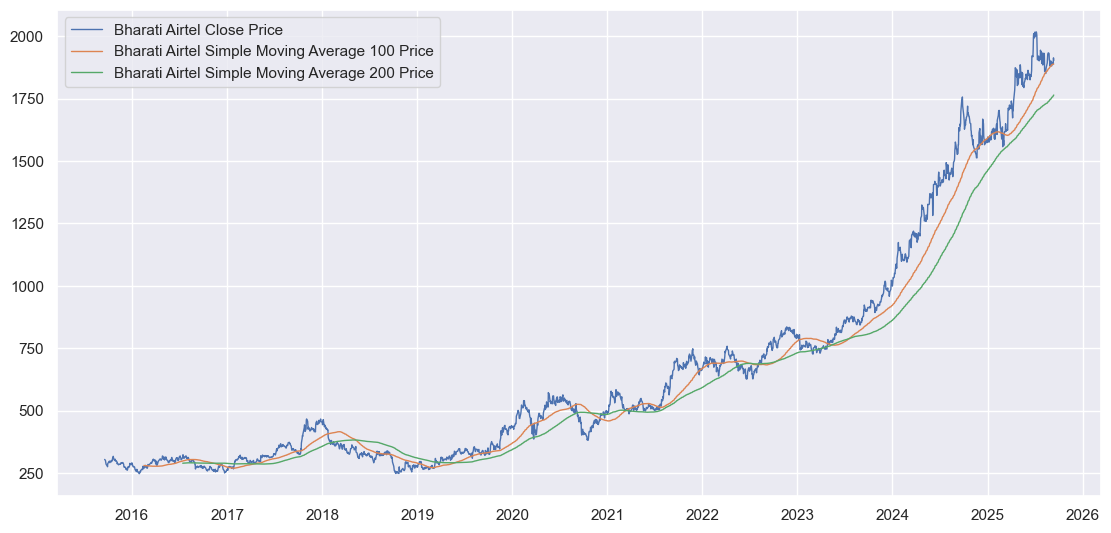

In [1896]:
plt.figure(figsize=(12, 6))
plt.plot(df1.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ma100, label = f'{stock} Simple Moving Average 100 Price', linewidth = 1)
plt.plot(ma200, label = f'{stock} Simple Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [1897]:
### Exponential 
ema100 = df1.Close.ewm(span=100, adjust = False).mean()
ema200 = df1.Close.ewm(span=200, adjust = False).mean()

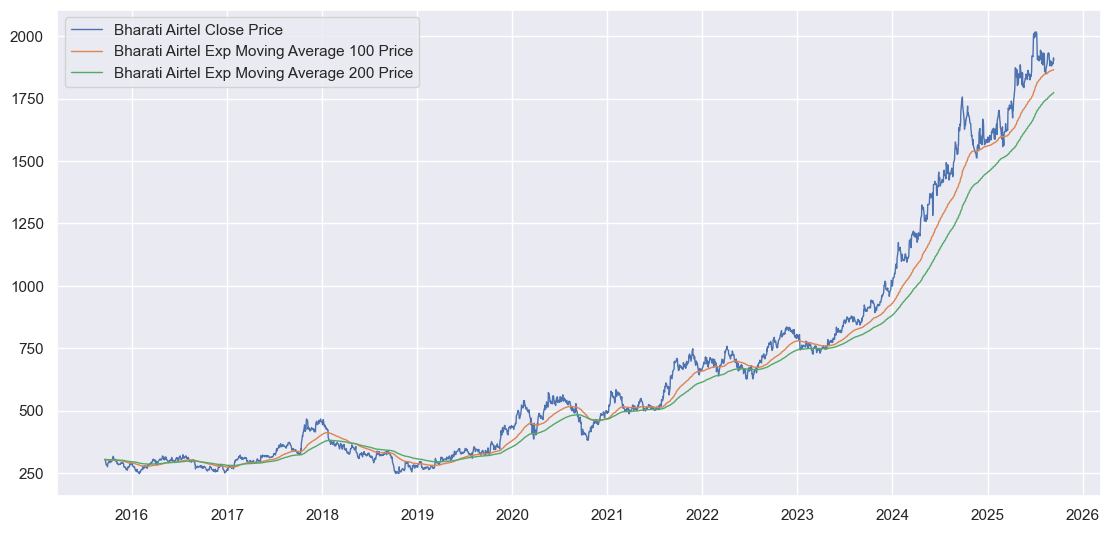

In [1898]:
plt.figure(figsize=(12, 6))
plt.plot(df1.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ema100, label = f'{stock} Exp Moving Average 100 Price', linewidth = 1)
plt.plot(ema200, label = f'{stock} Exp Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [1899]:
df1.head()

,Date,Close,High,Low,Open,Volume
Time_Stamp,,,,,,
2015-09-18,2015-09-18,304.676453,309.841183,301.517853,307.365526,6783352
2015-09-21,2015-09-21,300.749603,306.469222,299.981301,302.200848,2792725
2015-09-22,2015-09-22,293.493256,303.054413,290.505406,303.054413,4558449
2015-09-23,2015-09-23,288.456665,292.810428,287.048115,290.249381,4087837
2015-09-24,2015-09-24,284.230988,289.054248,283.462685,288.456667,9967481


In [1900]:
df1.head()

,Date,Close,High,Low,Open,Volume
Time_Stamp,,,,,,
2015-09-18,2015-09-18,304.676453,309.841183,301.517853,307.365526,6783352
2015-09-21,2015-09-21,300.749603,306.469222,299.981301,302.200848,2792725
2015-09-22,2015-09-22,293.493256,303.054413,290.505406,303.054413,4558449
2015-09-23,2015-09-23,288.456665,292.810428,287.048115,290.249381,4087837
2015-09-24,2015-09-24,284.230988,289.054248,283.462685,288.456667,9967481


In [1901]:
train_df.shape

(1972, 1)

In [1902]:
test_df.shape

(493, 1)

### Facebook Prophet model

In [1903]:
import prophet
dir(prophet)

['Path',
 'Prophet',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'about',
 'diagnostics',
 'f',
 'forecaster',
 'here',
 'make_holidays',
 'models',
 'plot']

In [1904]:
df.head()

,Date,Close,High,Low,Open,Volume
1,2015-09-18,304.676453,309.841183,301.517853,307.365526,6783352
2,2015-09-21,300.749603,306.469222,299.981301,302.200848,2792725
3,2015-09-22,293.493256,303.054413,290.505406,303.054413,4558449
4,2015-09-23,288.456665,292.810428,287.048115,290.249381,4087837
5,2015-09-24,284.230988,289.054248,283.462685,288.456667,9967481


In [1905]:
df.describe()

,Date,Close,High,Low,Open,Volume
count,2465,2465.000000,2465.000000,2465.000000,2465.000000,2.465000e+03
mean,2020-09-19 10:02:52.332657152,667.486515,675.629446,659.398487,667.829102,8.871615e+06
min,2015-09-18 00:00:00,247.480286,252.426538,240.980315,246.377009,0.000000e+00
25%,2018-03-21 00:00:00,320.136078,325.246295,315.518895,320.532594,3.788601e+06
50%,2020-09-22 00:00:00,504.377258,510.852880,499.820339,506.919526,5.773233e+06
75%,2023-03-15 00:00:00,796.161987,805.439091,789.486384,795.720168,9.944839e+06
max,2025-09-12 00:00:00,2017.037842,2028.839116,2001.567108,2024.872299,1.985470e+08
std,NaN,457.366267,461.165562,453.604702,457.472847,1.108306e+07


In [1906]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2465 entries, 1 to 2465
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2465 non-null   datetime64[ns]
 1   Close   2465 non-null   float64       
 2   High    2465 non-null   float64       
 3   Low     2465 non-null   float64       
 4   Open    2465 non-null   float64       
 5   Volume  2465 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 134.8 KB


In [1907]:
df.isnull().sum()

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [1908]:
from prophet import Prophet

In [1909]:
df_prophet = df[['Date','Open']]
df_prophet = df_prophet.rename(columns={'Date':'ds', 'Open':'y'})
df_prophet.head()

,ds,y
1,2015-09-18,307.365526
2,2015-09-21,302.200848
3,2015-09-22,303.054413
4,2015-09-23,290.249381
5,2015-09-24,288.456667


In [1910]:
df_prophet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2465 entries, 1 to 2465
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      2465 non-null   datetime64[ns]
 1   y       2465 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.8 KB


In [1911]:
prophet_model = Prophet()
prophet_model.fit(df_prophet)

01:29:34 - cmdstanpy - INFO - Chain [1] start processing
01:29:35 - cmdstanpy - INFO - Chain [1] done processing


In [1912]:
prophet_model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None}),
             ('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [1913]:
prophet_model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [1914]:
future_global = prophet_model.make_future_dataframe(periods=100, freq='D')
future_global.tail()

,ds
2560,2025-12-17
2561,2025-12-18
2562,2025-12-19
2563,2025-12-20
2564,2025-12-21


In [1915]:
len(df_prophet), len(future_global)

(2465, 2565)

In [1916]:
prediction_df = prophet_model.predict(future_global)
prediction_df.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2560,2025-12-17,2147.464759,2097.818596,2211.969435,2135.431807,2157.999288,8.306314,8.306314,8.306314,11.199847,11.199847,11.199847,-2.893532,-2.893532,-2.893532,0.0,0.0,0.0,2155.771073
2561,2025-12-18,2148.978969,2099.070929,2213.504432,2136.597203,2159.717346,7.704911,7.704911,7.704911,11.724578,11.724578,11.724578,-4.019667,-4.019667,-4.019667,0.0,0.0,0.0,2156.683880
2562,2025-12-19,2150.493179,2100.534035,2217.262273,2137.854894,2161.743650,6.149503,6.149503,6.149503,11.154154,11.154154,11.154154,-5.004651,-5.004651,-5.004651,0.0,0.0,0.0,2156.642682
2563,2025-12-20,2152.007389,2058.607312,2173.508170,2139.130639,2163.488601,-32.451157,-32.451157,-32.451157,-26.618730,-26.618730,-26.618730,-5.832427,-5.832427,-5.832427,0.0,0.0,0.0,2119.556232
2564,2025-12-21,2153.521599,2055.469990,2174.149076,2140.413998,2165.242265,-37.362071,-37.362071,-37.362071,-30.870863,-30.870863,-30.870863,-6.491209,-6.491209,-6.491209,0.0,0.0,0.0,2116.159528


In [1917]:
prediction_df.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [1918]:
prediction_df_new = prediction_df[['ds','yhat_lower','yhat_upper','yhat']]

In [1919]:
prediction_df_new.head()

,ds,yhat_lower,yhat_upper,yhat
0,2015-09-18,248.010516,356.182195,301.593878
1,2015-09-21,249.315134,356.453075,303.282729
2,2015-09-22,251.348588,360.017323,304.168633
3,2015-09-23,248.463263,359.404429,303.075965
4,2015-09-24,246.399928,356.233598,303.216740


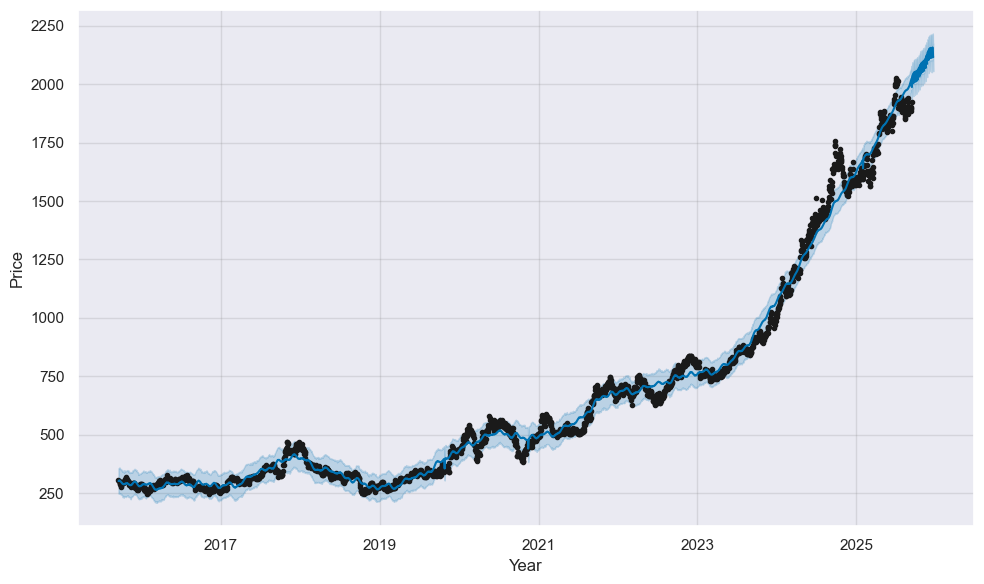

In [1920]:
prophet_model.plot(prediction_df_new)
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

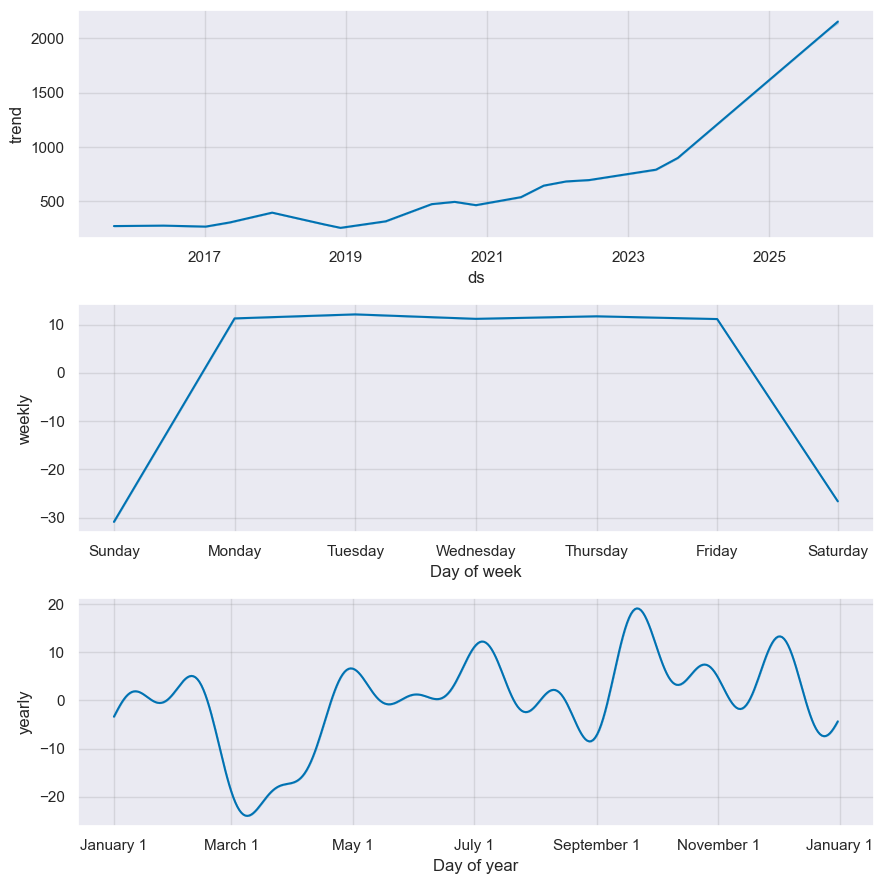

In [1921]:
prophet_model.plot_components(prediction_df)
plt.show()

## Building LSTM Model

In [1922]:
## Since LSTM is sensitive to the Scale of the data. Hence will have to scale the data using MinMax Scaler

In [1923]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2465 entries, 1 to 2465
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2465 non-null   datetime64[ns]
 1   Close   2465 non-null   float64       
 2   High    2465 non-null   float64       
 3   Low     2465 non-null   float64       
 4   Open    2465 non-null   float64       
 5   Volume  2465 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 134.8 KB


In [1924]:
df_new=df.reset_index()['Close']

In [1925]:
df_new.shape

(2465,)

In [1926]:
### Scaling the data using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df_new=scaler.fit_transform(np.array(df_new).reshape(-1,1))

In [1927]:
df_new.shape

(2465, 1)

In [1928]:
### Splitting the data into training and testing

training_size=int(len(df_new)*0.75)
test_size=len(df_new)-training_size
train_data,test_data=df_new[0:training_size,:],df_new[training_size:len(df_new),:1]

## Shape
print(train_data.shape)
print(test_data.shape)

(1848, 1)
(617, 1)


In [1929]:
test_data

array([[0.27991523],
       [0.27397916],
       [0.28024808],
       [0.27888889],
       [0.28008165],
       [0.27994296],
       [0.28374316],
       [0.2831329 ],
       [0.28274455],
       [0.27536608],
       [0.27267541],
       [0.27567123],
       [0.28207879],
       [0.2836877 ],
       [0.28507461],
       [0.28718275],
       [0.28962376],
       [0.28793167],
       [0.28568484],
       [0.28157953],
       [0.28163502],
       [0.28435342],
       [0.28859743],
       [0.28465854],
       [0.28191237],
       [0.28876382],
       [0.28923542],
       [0.29647521],
       [0.30357627],
       [0.29852788],
       [0.29248079],
       [0.29791762],
       [0.29691901],
       [0.30049729],
       [0.30041406],
       [0.30177328],
       [0.2976402 ],
       [0.29949872],
       [0.30232808],
       [0.29694678],
       [0.29966514],
       [0.30360403],
       [0.30715462],
       [0.30499095],
       [0.30393691],
       [0.30474137],
       [0.31655804],
       [0.313

In [1930]:
# Convert array of values to a dataset matrix (100 features and 1 o/p)
def create_sequences(data, sequence_length=100):
        x_train = []
        y_train = []
        
        # Verify data shape
        if len(data.shape) < 2:
            data = data.reshape(-1, 1)
            
        for i in range(sequence_length, len(data)):
            # Create sequence
            x_train.append(data[i-sequence_length:i])
            # Add target
            y_train.append(data[i, 0])
            
        # Convert to numpy arrays
        x_train = np.array(x_train)
        y_train = np.array(y_train)
        
        print(f"Sequences shape: {x_train.shape}")
        print(f"Target shape: {y_train.shape}")
        
        return x_train, y_train

In [1931]:
## Reshapeing X_train, X_test into X=t, t+1, t+2, t+3 and y= t+4 as it is required for LSTM model
sequence_length = 100
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

Sequences shape: (1748, 100, 1)
Target shape: (1748,)
Sequences shape: (517, 100, 1)
Target shape: (517,)


In [1932]:
### Create a Stacked LSTM model
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from tensorflow.keras.callbacks import EarlyStopping

In [1933]:
# --- LSTM Model building ---
model_lstm = Sequential()
model_lstm.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1)))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=50, return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=50))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(units=1))

In [1934]:
model_lstm.summary()

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_71 (LSTM)                  │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_67 (Dropout)            │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_72 (LSTM)                  │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_68 (Dropout)            │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_73 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_69 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [1935]:
## Complie
model_lstm.compile(optimizer='adam', loss='mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
# Add EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [1936]:
history = model_lstm.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stop], verbose=1)

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 0.0075 - mean_absolute_error: 0.0611 - val_loss: 0.0012 - val_mean_absolute_error: 0.0259
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 5.2308e-04 - mean_absolute_error: 0.0172 - val_loss: 8.2332e-04 - val_mean_absolute_error: 0.0209
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 4.1214e-04 - mean_absolute_error: 0.0144 - val_loss: 8.6301e-04 - val_mean_absolute_error: 0.0238
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 4.2364e-04 - mean_absolute_error: 0.0145 - val_loss: 0.0030 - val_mean_absolute_error: 0.0458
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 3.8384e-04 - mean_absolute_error: 0.0138 - val_loss: 0.0037 - val_mean_absolute_error: 0.0509
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 3.2626e-04 - mean_absolute_error: 0.0129 - val_loss: 0.0034 - val_mean_absolute_error: 0.0481
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 2.9962e-04 - mean_a

In [1937]:
# --- Predictions & Inverse Scaling ---
y_pred_train = model_lstm.predict(X_train)
y_pred_test = model_lstm.predict(X_test)

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [1938]:
y_pred_test

array([[0.3606343 ],
       [0.36072093],
       [0.3607023 ],
       [0.36056417],
       [0.3602677 ],
       [0.35980415],
       [0.35918412],
       [0.3584961 ],
       [0.35782692],
       [0.35719207],
       [0.35660744],
       [0.35609865],
       [0.3556649 ],
       [0.35523975],
       [0.35479638],
       [0.35431793],
       [0.35384023],
       [0.35338536],
       [0.35297024],
       [0.35266396],
       [0.3524798 ],
       [0.35245994],
       [0.35263592],
       [0.3530068 ],
       [0.35365465],
       [0.35459924],
       [0.3559074 ],
       [0.35751325],
       [0.35930166],
       [0.3612058 ],
       [0.36313576],
       [0.3650186 ],
       [0.3668116 ],
       [0.36851576],
       [0.37014982],
       [0.37172282],
       [0.37322968],
       [0.37465805],
       [0.37601596],
       [0.37729302],
       [0.37847447],
       [0.37964925],
       [0.38089195],
       [0.3822106 ],
       [0.3836099 ],
       [0.38504392],
       [0.3865012 ],
       [0.387

In [1939]:
## Transform back to orginal Form
y_pred_train_rescaled = scaler.inverse_transform(y_pred_train)
y_train_rescaled = scaler.inverse_transform(y_train.reshape(-1, 1))

y_pred_rescaled = scaler.inverse_transform(y_pred_test)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

In [1940]:
y_pred_train_rescaled.shape, y_pred_rescaled.shape, y_test_rescaled.shape

((1748, 1), (517, 1), (517, 1))

In [1941]:
# Make sure lengths match
print(f"y_test length: {len(y_test_rescaled)}")
print(f"y_pred_test_rescaled length: {len(y_pred_rescaled)}")

y_test length: 517
y_pred_test_rescaled length: 517


In [1942]:
## Calculate Peformance Metrics
import math
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
train_rmse = np.sqrt(mean_squared_error(y_train_rescaled, y_pred_train_rescaled))
rmse = np.sqrt(mse)
print("Bharti Airtel Evaluation Metrics")              
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"Training RMSE: {train_rmse:.2f}")
print(f"Testing RMSE: {rmse:.2f}")

Bharti Airtel Evaluation Metrics
MAE: 37.02
MSE: 2578.08
Training RMSE: 24.12
Testing RMSE: 50.77


In [1943]:
score = r2_score(y_test_rescaled, y_pred_rescaled)
print(f"R2 Score: {score*100:.2f}")

R2 Score: 97.79


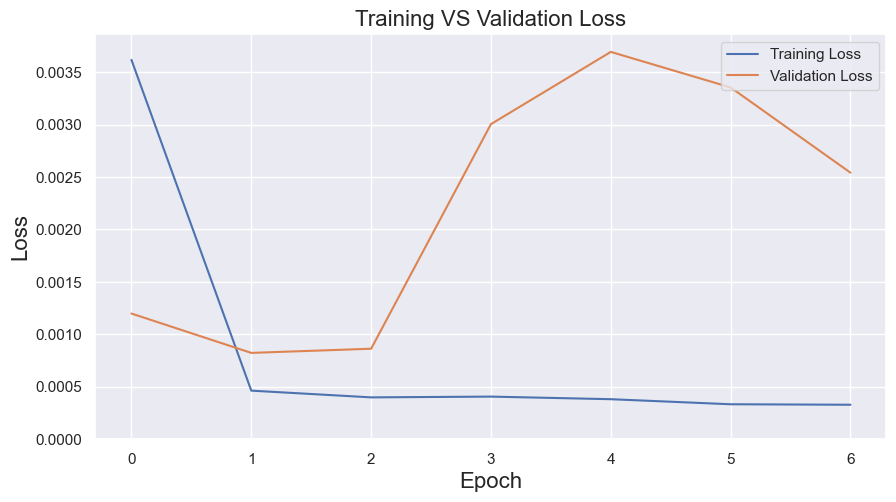

In [1944]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.ylim([0,max(plt.ylim())])
plt.title('Training VS Validation Loss', fontsize=16)
plt.show()

In [1945]:
scaler.scale_

array([0.00056511])

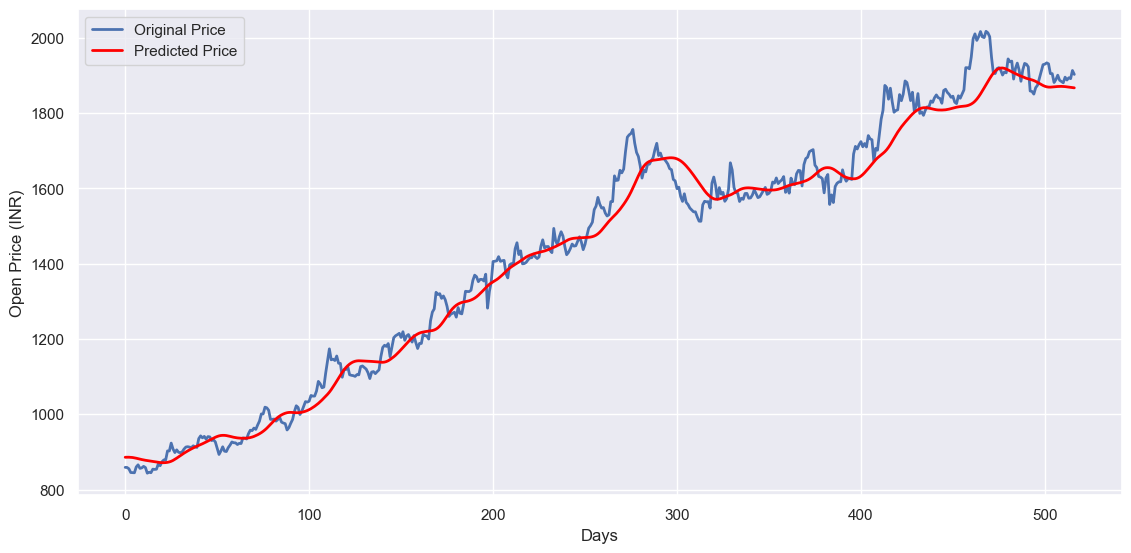

In [1946]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label = 'Original Price', linewidth = 2)
plt.plot(y_pred_rescaled, label = 'Predicted Price', linewidth = 2, color='red')
plt.legend()
plt.xlabel("Days")
plt.ylabel("Open Price (INR)")
plt.legend()
plt.grid(True)
plt.show()

In [1947]:
# Save the LSTM model in the native Keras SavedModel format

model_lstm.save('lstm_model.keras')
print("LSTM model saved successfully in Keras SavedModel format.")

LSTM model saved successfully in Keras SavedModel format.


In [1948]:
len(test_data)

617

In [1949]:
x_input=test_data[517:].reshape(1,-1)
x_input.shape

(1, 100)

In [1950]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [1951]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<50):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model_lstm.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model_lstm.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.91495466]
101
1 day input [0.8785552  0.88113325 0.8822541  0.9050635  0.89592849 0.90590413
 0.92551911 0.92316533 0.91089192 0.89604059 0.90859421 0.88046066
 0.88808251 0.90657658 0.87676183 0.87917171 0.87390371 0.88152549
 0.88651335 0.88668139 0.89548017 0.89346268 0.90035585 0.90455909
 0.90041187 0.89923501 0.89206155 0.91117213 0.91307759 0.90825792
 0.90539972 0.90091628 0.90265363 0.89368673 0.89155714 0.90327013
 0.89962732 0.90584812 0.91206884 0.94552633 0.94530221 0.94378905
 0.9617227  0.98901562 0.99618901 0.98638155 0.99187374 0.99966371
 0.99181773 0.9906408  1.         0.99781426 0.99204185 0.96110626
 0.93723203 0.93667161 0.94412528 0.94547032 0.94171548 0.93442551
 0.9390594  0.93770319 0.95861237 0.95426096 0.95527819 0.92837882
 0.94420199 0.95228306 0.94194154 0.92504464 0.94211103 0.95183101
 0.95064422 0.94663193 0.9104647  0.90978659 0.9057743  0.91543772
 0.91905446 0.92950905 0.93934196 0.94990962 0.95075729 0.95267868
 0.95120933 0.9365164  0.9365164 

In [1952]:
day_new=np.arange(1,101)
day_pred=np.arange(101,151)

In [1953]:
len(df_new)

2465

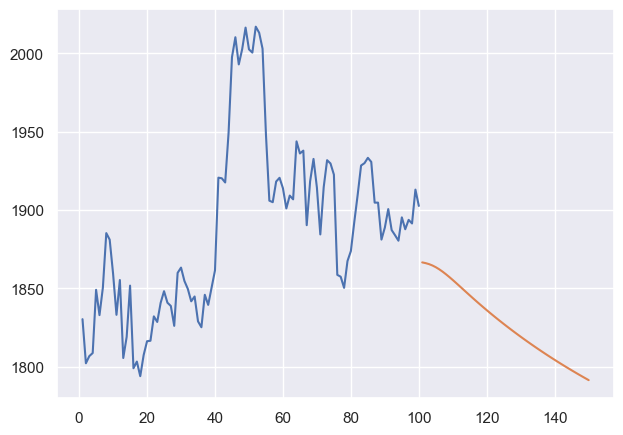

In [1954]:
## Prediction for next 50 days
plt.plot(day_new,scaler.inverse_transform(df_new[2365:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

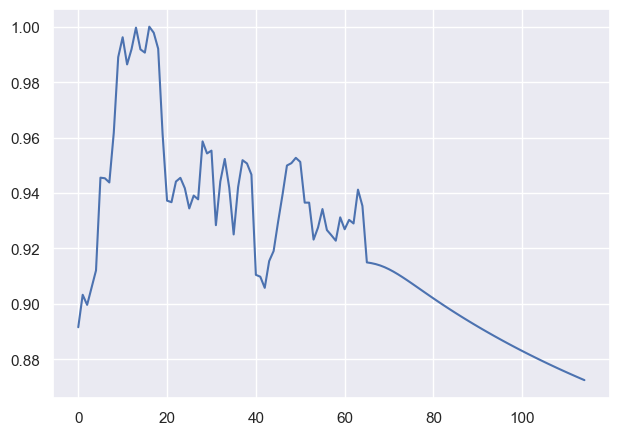

In [1955]:
df3=df_new.tolist()
df3.extend(lst_output)
plt.plot(df3[2400:])

In [1956]:
## Transform back to original data 
df3=scaler.inverse_transform(df3).tolist()

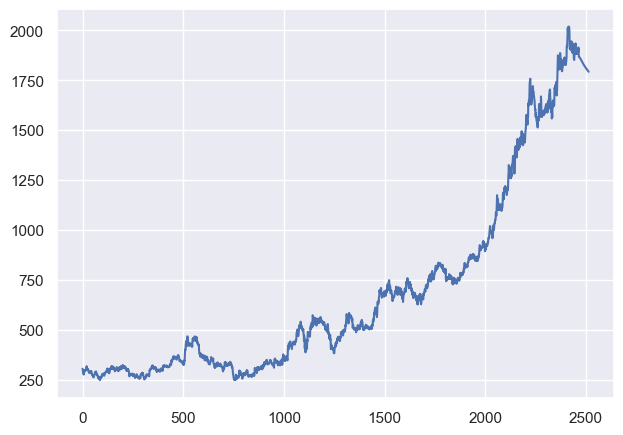

In [1957]:
plt.plot(df3)